<a href="https://colab.research.google.com/github/tai117/Metodos-Numericos-DCI/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecuación de Schrodinger dependiente del tiempo**
$$i\hbar\frac{\partial}{\partial t} \psi(x,t) = [\frac{-\hbar ^2}{2\mu} \nabla ^2 + V(x,t)]\psi(x,t)$$
tomando ħ = 1 y transformando la ecuacion a:
$$i\frac{\partial}{\partial t} \psi(x,t) = -\frac {1}{2} \frac{\partial^2}{\partial x^2}\psi(x,t) + V(x,t)\psi(x,t)$$

# **Particula libre**
## **Funcion de onda para esta particula (espacial)**
$$\psi(x) = \sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L})$$
$$V \neq 0$$
*n es el nivel de energia, como no podemos tener una longitud infinita acotamos la funcion con L*

# **Primera y segunda derivada de una funcion (Diferencias finitas)**
*Utilizadno metodos de diferenciacion de alta exactitud definimos la primer derivada como:*
$$f'(x) = \frac{f(x+1) - f(x)}{\Delta x}$$
*De la misma manera definimos la segunda derivada como:*
$$f''(x) = \frac{f(x+1) - 2f(x) + f(x-1)}{\Delta x ^2}$$

# **Aplicacion del metodo de diferencias finitas a la ecuación de Schrodinger**
Una vez revisada la representación de la primer y segunda derivada, podemos aplicar este concepto a la ecuación de Schrodinder obteniendo lo siguiente:
$$i\frac{\psi(x,t+1) - \psi(x,t)}{\Delta t} = -\frac {1}{2} \frac{\psi(x+1,t) - 2\psi(x,t) + \psi(x-1,t)}{\Delta x^2} + V(x,t)\psi(x,t)$$
Ahora podemos obtener la funcion para determinar como evoluciona la funcion de onda con el tiempo
$$\psi(x,t+1) = \psi(x,t) + \frac {i\Delta t}{2\Delta x^2} [\psi(x+1,t) - 2\psi(x,t) + \psi(x-1,t)] - i\Delta tV(x,t)\psi(x,t)$$
Conseguido esto, puede realizarse el codigo para obtener la evolucion del sistema

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


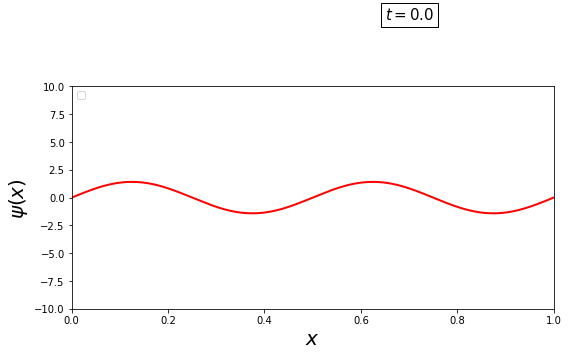

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit

Nx = 300
Nt = 100000
dx = 1/(Nx-1)
dt = 1e-7
L = 1
n = 4
x = np.linspace(0, L, Nx)
psi0 = np.sqrt(2/L)*np.sin(n*np.pi*x/L)
mu, sigma = L/2, L/20
V = -1e4*np.exp(-(x-mu)**2/(2*sigma**2))
psi = np.zeros([Nt,Nx])
psi[0] = psi0

@numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True)
def compute_psi(psi):
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i]
        
        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/normal
        
    return psi

psi_m1 = compute_psi(psi.astype(complex))

def animate(i):
    #ln1.set_data(x, np.absolute(psi_m1[100*i])**2)
    ln1.set_data(x, psi_m1[100*i])
    time_text.set_text('$t=$'+'{:.1f}'.format(100*i*dt*1e4))
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
#ax.grid()
ln1, = plt.plot([], [], 'r-', lw=2, markersize=8)
time_text = ax.text(0.65, 16, '', fontsize=15,
           bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(-10/L,10/L)
ax.set_xlim(0,L)
ax.set_ylabel('$\psi(x)$', fontsize=20)
ax.set_xlabel('$x$', fontsize=20)
ax.legend(loc='upper left')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('wavefunction.gif',writer='pillow',fps=50,dpi=100)

# **Particula en una caja con paredes de potencial infinito**
## **Funcion de onda para esta particula (espacial)**
$$\psi(x) = \sqrt{\frac{2}{L}}sin(\frac{n\pi x}{L})$$
$$V = 0$$
n es el nivel de energia

# **Ecuación para la caja con potencial V = 0**
$$\psi(x,t+1) = \psi(x,t) + \frac {i\Delta t}{2\Delta x^2} [\psi(x+1,t) - 2\psi(x,t) + \psi(x-1,t)] $$

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


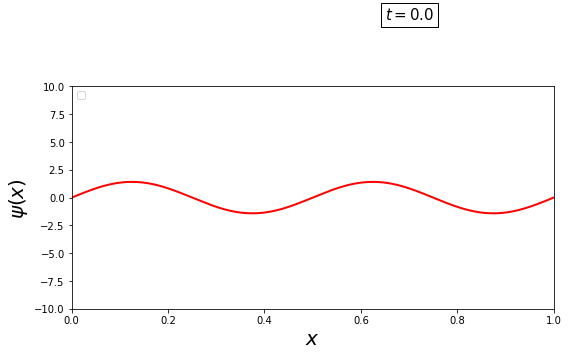

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit

Nx = 300
Nt = 100000
dx = 1/(Nx-1)
dt = 1e-7
L = 1
n = 4
x = np.linspace(0, L, Nx)
psi0 = np.sqrt(2/L)*np.sin(n*np.pi*x/L)
mu, sigma = L/2, L/20
V = 0*x
psi = np.zeros([Nt,Nx])
psi[0] = psi0

@numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True)
def compute_psi(psi):
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i]
        
        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/normal
        
    return psi

psi_m1 = compute_psi(psi.astype(complex))

def animate(i):
    #ln1.set_data(x, np.absolute(psi_m1[100*i])**2)
    ln1.set_data(x, psi_m1[100*i])
    time_text.set_text('$t=$'+'{:.1f}'.format(100*i*dt*1e4))
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
#ax.grid()
ln1, = plt.plot([], [], 'r-', lw=2, markersize=8)
time_text = ax.text(0.65, 16, '', fontsize=15,
           bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(-10/L,10/L)
ax.set_xlim(0,L)
ax.set_ylabel('$\psi(x)$', fontsize=20)
ax.set_xlabel('$x$', fontsize=20)
ax.legend(loc='upper left')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('wavefunction_box.gif',writer='pillow',fps=50,dpi=100)